**EJERCICIO PRESENTADO POR:**

*   JOHANNA ALEXANDRA TREJOS
*   JAIME ANDRÉS CARVAJAL
*   EDISON YESID HERRERA
*   GILBERTO BOTIA
*   HENRY RAGUA



<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcoteran/deeplearning/blob/master/notebooks/3.2_deepleaningintroduction_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marcoteran/deeplearning/blob/master/notebooks/3.2_deepleaningintroduction_dnn.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Abrir en Kaggle" title="Abrir y ejecutar en Kaggle"/></a>
  </td>
</table>

# Ejemplo de código
# Guía 2: Proyecto Precio de vehículos usados
## Machine Learning II

Sergio David Díaz Veru
___

<h1 id="problema">Contexto analítico y exploración de datos</h1>

El mercado de autos usados es reconocido por ser un sector economico muy competido con un centenar de compañias que luchan por hacerse con una porción de la torta. El precio de los autos se devalua año año debido a multiples factores y determinar el precio correcto es clave para las compañias para lograr competir en el mercado. En este caso se requiere implementar una red neural que permita determinar el valor más justo para los vehiculos dependiento de sus atributos.

Se cuenta con un dataset used-car-price-prediction-dataset cargado directamente desde kaggle


In [41]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import io
import os
#from google.colab import files #Librería necesaria para interactuar con archivos en Colab

In [42]:
!pip install kagglehub

In [43]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taeefnajib/used-car-price-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/taeefnajib/used-car-price-prediction-dataset/versions/1


In [44]:
os.listdir(path)

['used_cars.csv']

In [45]:
#uploaded = files.upload()
#cars = pd.read_csv(io.StringIO(uploaded['Craiglist_Cars.csv'].decode('utf-8')), sep = ',' )
cars = pd.read_csv(path+'/used_cars.csv', sep = ',' )

In [46]:
cars

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


# 1. Evalua la cantidad, tipo y completitud de las variables disponibles

En esta sección, se realiza una exploración básica del conjunto de datos "cars" utilizando algunas funciones de pandas.

Primero, se utiliza la función shape de pandas para imprimir la cantidad de filas y columnas en "cars". Esto proporciona una idea inicial de la magnitud del conjunto de datos.

Luego, se utiliza la función isnull para detectar la cantidad de valores nulos en cada columna de "cars". Se calcula el porcentaje de valores nulos para cada columna y se imprime en pantalla.

In [47]:
print(cars.shape)
100*cars.isnull().sum()/cars.shape[0]

(4009, 12)


,0
brand,0.000000
model,0.000000
model_year,0.000000
milage,0.000000
fuel_type,4.240459
engine,0.000000
transmission,0.000000
ext_col,0.000000
int_col,0.000000
accident,2.818658


A continuación, se utiliza la función DataFrame de pandas para crear un nuevo dataframe llamado "types", que almacena los tipos de datos de cada columna en "cars". Esto ayuda a comprender mejor la estructura de los datos y cómo se deben manejar

In [48]:
types = pd.DataFrame(cars.dtypes)
print(types.groupby(0).size())

0
int64      1
object    11
dtype: int64


Finalmente, se crea una lista llamada "categoricas" que almacena los nombres de las columnas que contienen datos categóricos (es decir, no numéricos). Se utiliza un bucle para recorrer cada columna categórica y se imprime en pantalla la cantidad de valores únicos en esa columna. Esto proporciona información adicional sobre la naturaleza de los datos y cómo se deben procesar para el análisis posterior.

In [49]:
categoricas = types.index[types[0] == 'O'].values
for line in categoricas:
 print("La variable "+ line +" contiene:",str(len(cars[line].unique()))+" distinct values")

La variable brand contiene: 57 distinct values
La variable model contiene: 1898 distinct values
La variable milage contiene: 2818 distinct values
La variable fuel_type contiene: 8 distinct values
La variable engine contiene: 1146 distinct values
La variable transmission contiene: 62 distinct values
La variable ext_col contiene: 319 distinct values
La variable int_col contiene: 156 distinct values
La variable accident contiene: 3 distinct values
La variable clean_title contiene: 2 distinct values
La variable price contiene: 1569 distinct values


# Ingeniería de datos

Ahora se debe preparar la información para poder alimentar la red neuronal.

# 2. Implementa estrategías para tratar la información nula en las variables cuya tasa de nulos sea máximo el 10%

En esta sección, se realizan algunas tareas de limpieza y preparación de datos para el conjunto de datos "cars".

1. En primer lugar, se rellenan los valores faltantes en la columna "fuel" con el valor más común utilizando la función fillna de pandas. Este es un ejemplo de cómo manejar valores nulos o faltantes en el conjunto de datos.
2. Luego, se vuelven a imprimir las dimensiones de "cars" y se verifica si hay valores nulos en otras columnas.
3. Después, se rellenan los valores faltantes en las columnas "title_status", "transmission" y "manufacturer" con el valor más común utilizando la función fillna de pandas.

In [50]:
#se rellenan los valores faltantes en la columna "fuel" con el valor más común utilizando la función fillna de pandas
cars['fuel_type'].fillna(cars['fuel_type'].mode()[0], inplace=True)

<ipython-input-50-5adc0d627564>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['fuel_type'].fillna(cars['fuel_type'].mode()[0], inplace=True)


In [51]:
#Luego, se vuelven a imprimir las dimensiones de "cars" y se verifica si hay valores nulos en otras columnas
print(cars.shape)
100*cars.isnull().sum()/cars.shape[0]

(4009, 12)


,0
brand,0.000000
model,0.000000
model_year,0.000000
milage,0.000000
fuel_type,0.000000
engine,0.000000
transmission,0.000000
ext_col,0.000000
int_col,0.000000
accident,2.818658


In [52]:
 #se rellenan los valores faltantes
 cars['accident'].fillna(cars['accident'].mode()[0], inplace=True)
 cars['clean_title'].fillna(cars['clean_title'].mode()[0], inplace=True)

<ipython-input-52-17f9964ee432>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['accident'].fillna(cars['accident'].mode()[0], inplace=True)
<ipython-input-52-17f9964ee432>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [53]:

#Verificamos el cambio
100*cars.isnull().sum()/cars.shape[0]

,0
brand,0.0
model,0.0
model_year,0.0
milage,0.0
fuel_type,0.0
engine,0.0
transmission,0.0
ext_col,0.0
int_col,0.0
accident,0.0


Luego del procedimiento anterior se debe proceder a convertir las variables categoricas en variables numericas. Durante el curso implementamos un método de One Hot Encoding disponible en Scikit Learn. En este caso utilizaremos una funcionalidad embedida en Pandas denominada ["get_dummies"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html):

* A continuación, se crea una copia del dataframe llamado "df" y se aplican técnicas de codificación de variables categóricas. Se crea una nueva columna para cada valor posible en cada variable categórica y se codifica como 1 si la observación tiene ese valor y 0 si no lo tiene. Esto se realiza utilizando la función get_dummies de pandas.
* Además, se eliminan las columnas que contienen la categoría "other" ya que no aportan ningún valor al conjunto de datos.
* Luego, se vuelven a imprimir las dimensiones de "df" y se imprime una vista previa del conjunto de datos.

In [54]:
df= cars.copy()
for col in categoricas:
    df = pd.concat([df, (pd.get_dummies(df[col])).astype(int)], axis=1)
    df.drop(columns=[col],inplace=True)
# Al crear las variables dummies se crean varias columnas referentes a categorias
# 'other' que no aportan ningún valor al dataset por lo cual las eliminamos
#df.drop('other', axis=1, inplace=True)
print(df.shape)
df.head(3)

(4009, 8036)


,model_year,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,...,"$97,993","$98,000","$98,900","$99,000","$99,750","$99,800","$99,900","$99,950","$99,998","$99,999"
0,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A continuación, se utiliza la función DataFrame de pandas para crear un nuevo dataframe llamado "types", que almacena los tipos de datos de cada columna en "df".

In [55]:
types = pd.DataFrame(df.dtypes)
print("Tipos de variables",types.groupby(0).size())

Tipos de variables 0
int64    8036
dtype: int64


Después, se seleccionan las columnas numéricas del conjunto de datos y se eliminan las que corresponden a la variable objetivo ("price"). Esto se realiza utilizando la función set de Python para encontrar las columnas numéricas y luego la función list para convertir el resultado en una lista.

Por último, se crea un nuevo dataframe llamado "variables_consolidadas" que contiene solo las variables numéricas y se crea un nuevo dataframe llamado "objetivo" que contiene solo la variable objetivo ("price").

In [56]:
# se seleccionan las columnas numéricas del conjunto de datos
numeric_columns = types.index[types[0] == 'int64'].values
numeric_columns = list(numeric_columns)
# se elimina de numeric_columns los items que contienen la palabra price
numeric_columns = [a for a in numeric_columns if not a.startswith("$")]
# se crea un nuevo dataframe con las variables numéricas
variables_consolidadas = df[numeric_columns]
# se crea un nuevo dataframe con la variable objetivo
variables_consolidadas

,model_year,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,...,Yellow,Yellow,–,–,–,–,–,At least 1 accident or damage reported,None reported,Yes
0,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2021,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,2023,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4005,2022,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4006,2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4007,2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# 3. Separa el set de datos consolidados en 3 sets (entrenamiento, prueba y validación) de acuerdo con las recomendaciones vistas en el curso.


En estas líneas de código se utiliza la librería Scikit-learn para dividir los datos en conjuntos de entrenamiento, validación y prueba. Se utiliza la función "train_test_split" para crear los tres conjuntos a partir de las variables consolidadas (x) y la variable objetivo (y).
* Primero, se divide en 80% de entrenamiento y 20% de prueba.
* Luego, se divide el conjunto de entrenamiento en 90% para entrenamiento y 10% para validación.

In [57]:
# Coloca tu código aquí
from sklearn.model_selection import train_test_split
# se divide el dataframe para que el 80% sea de entrenamiento y el restante para testing

In [58]:
#80% train 20% test
x_train, x_test, y_train, y_test = train_test_split(variables_consolidadas, cars['price'], test_size=0.2, random_state=1)

In [59]:
#90% train 10% val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [60]:
# se verifica la cantidad de filas para cada dataset resultante
print("Cantidad de filas en el conjunto de entrenamiento:", x_train.shape[0])
print("Cantidad de filas en el conjunto de validación:", x_val.shape[0])
print("Cantidad de filas en el conjunto de prueba:", x_test.shape[0])

Cantidad de filas en el conjunto de entrenamiento: 2886
Cantidad de filas en el conjunto de validación: 321
Cantidad de filas en el conjunto de prueba: 802


Posteriormente, se utiliza la función "reshape" para cambiar la forma de las variables objetivo y poder utilizarlas en modelos de aprendizaje automático.

In [61]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)

Finalmente, se imprimen las formas (shapes) de los conjuntos de entrenamiento, validación y prueba para verificar que se hayan creado correctamente.

In [62]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (2886, 6519)
Shape of x_test: (802, 6519)
Shape of x_val: (321, 6519)
Shape of y_train: (2886, 1)
Shape of y_test: (802, 1)
Shape of y_val: (321, 1)


<h1 id="arquitectura">Diseño, Entrenamiento y Evaluación de la RN</h1>

Una vez consolidado los sets de información de entrenamiento, validacion y pruebas ya podemos iniciar a modelar nuestra red neuronal con las siguientes consideraciones:
* Realiza la prueba con un par de arquitecturas iniciales.
* Evalua el desempeño de la red.
* Si el desempeño es bajo vuelve a la información y prueba estrategias de estandarización de la información.

# 4. Implementa una red neuronal cuyas pérdidas (MSE) con el set de prueba sea menor a 0.40.

Se importa la clase StandardScaler de la biblioteca sklearn.preprocessing, la cual es una técnica de preprocesamiento de datos que escala los datos para que tengan una media de cero y una desviación estándar de uno. Esto es importante porque ayuda a que el modelo pueda trabajar con variables en la misma escala, lo que puede mejorar su rendimiento.

In [63]:
# Se importa la clase StandardScaler de la biblioteca sklearn.preprocessing
from sklearn.preprocessing import StandardScaler


Se crea una instancia de StandardScaler() y se llama al método fit() con los datos de entrenamiento x_train, para que el objeto pueda aprender los parámetros de escalamiento a partir de estos datos.

In [64]:
# Se crea una instancia de StandardScaler()
scaler = StandardScaler()
# Se llama al método fit() con los datos de entrenamiento x_train
scaler.fit(x_train)

StandardScaler()

Se utiliza el método transform() para escalar los conjuntos de datos de entrenamiento, validación y prueba x_train, x_val y x_test, respectivamente.

In [65]:
# Se utiliza el método transform() para escalar los conjuntos de datos de entrenamiento, validación y prueba x_train, x_val y x_test
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

Se repiten los pasos anteriores para la variable objetivo y_train, y_val y y_test.

In [66]:
def convert_str_to_float_array(array):
    array = array.astype(str)
    array = np.char.replace(array, '$', '')
    array = np.char.replace(array, ',', '')
    array = array.astype(float)
    return array
# de los arrays y_train, y_val y y_test se eliminan los carácteres $ , y se convierten los valores a tipo número
y_train = convert_str_to_float_array(y_train)
y_val = convert_str_to_float_array(y_val)
y_test = convert_str_to_float_array(y_test)

In [67]:
scaler1 = StandardScaler()
# Se repiten los pasos anteriores para la variable objetivo y_train, y_val y y_test.
scaler1.fit(y_train)
y_train_scaled = scaler1.transform(y_train)
y_val_scaled = scaler1.transform(y_val)
y_test_scaled = scaler1.transform(y_test)

Se importa la clase Sequential y los módulos Dense, Dropout de la biblioteca Keras.

In [68]:
#Coloca tu código aquí
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model

Luego, se crea una instancia de la clase Sequential y se añaden varias capas Dense con activación relu, una capa Dropout y una capa final con activación linear

In [69]:
# se crea una instancia de la clase Sequential
sequential = Sequential()
# se añaden varias capas Dense con activación relu, una capa Dropout y
# una capa final con activación linear
sequential.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
sequential.add(Dropout(0.2))
sequential.add(Dense(64, activation='relu'))
sequential.add(Dropout(0.2))
sequential.add(Dense(32, activation='relu'))
sequential.add(Dropout(0.2))
sequential.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Se compila el modelo con el optimizador adam, la función de pérdida mse (mean squared error) y la métrica mean_absolute_error.

In [70]:
# Se compila el modelo con el optimizador adam, la función de pérdida mse (mean squared error) y la métrica mean_absolute_error.
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
#sequential.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error', 'mean_squared_error'])
sequential.compile(optimizer=optimizer, loss='mse', metrics=['mean_absolute_error', 'mean_squared_error'])

Se imprime un resumen del modelo con la función summary().

In [71]:
#Se imprime un resumen del modelo con la función summary()
sequential.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │         834,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 844,929 (3.22 MB)

 Trainable params: 844,929 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
!pip install pydot
!pip install graphviz
!conda install -c anaconda pydot=1.2.3
!conda install -c anaconda pyparsing=2.2.0
!conda install GraphViz


/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


In [73]:

import errno
import pydot
from tensorflow.keras.utils import plot_model

Muestra el diagrama del modelo en un archivo PNG

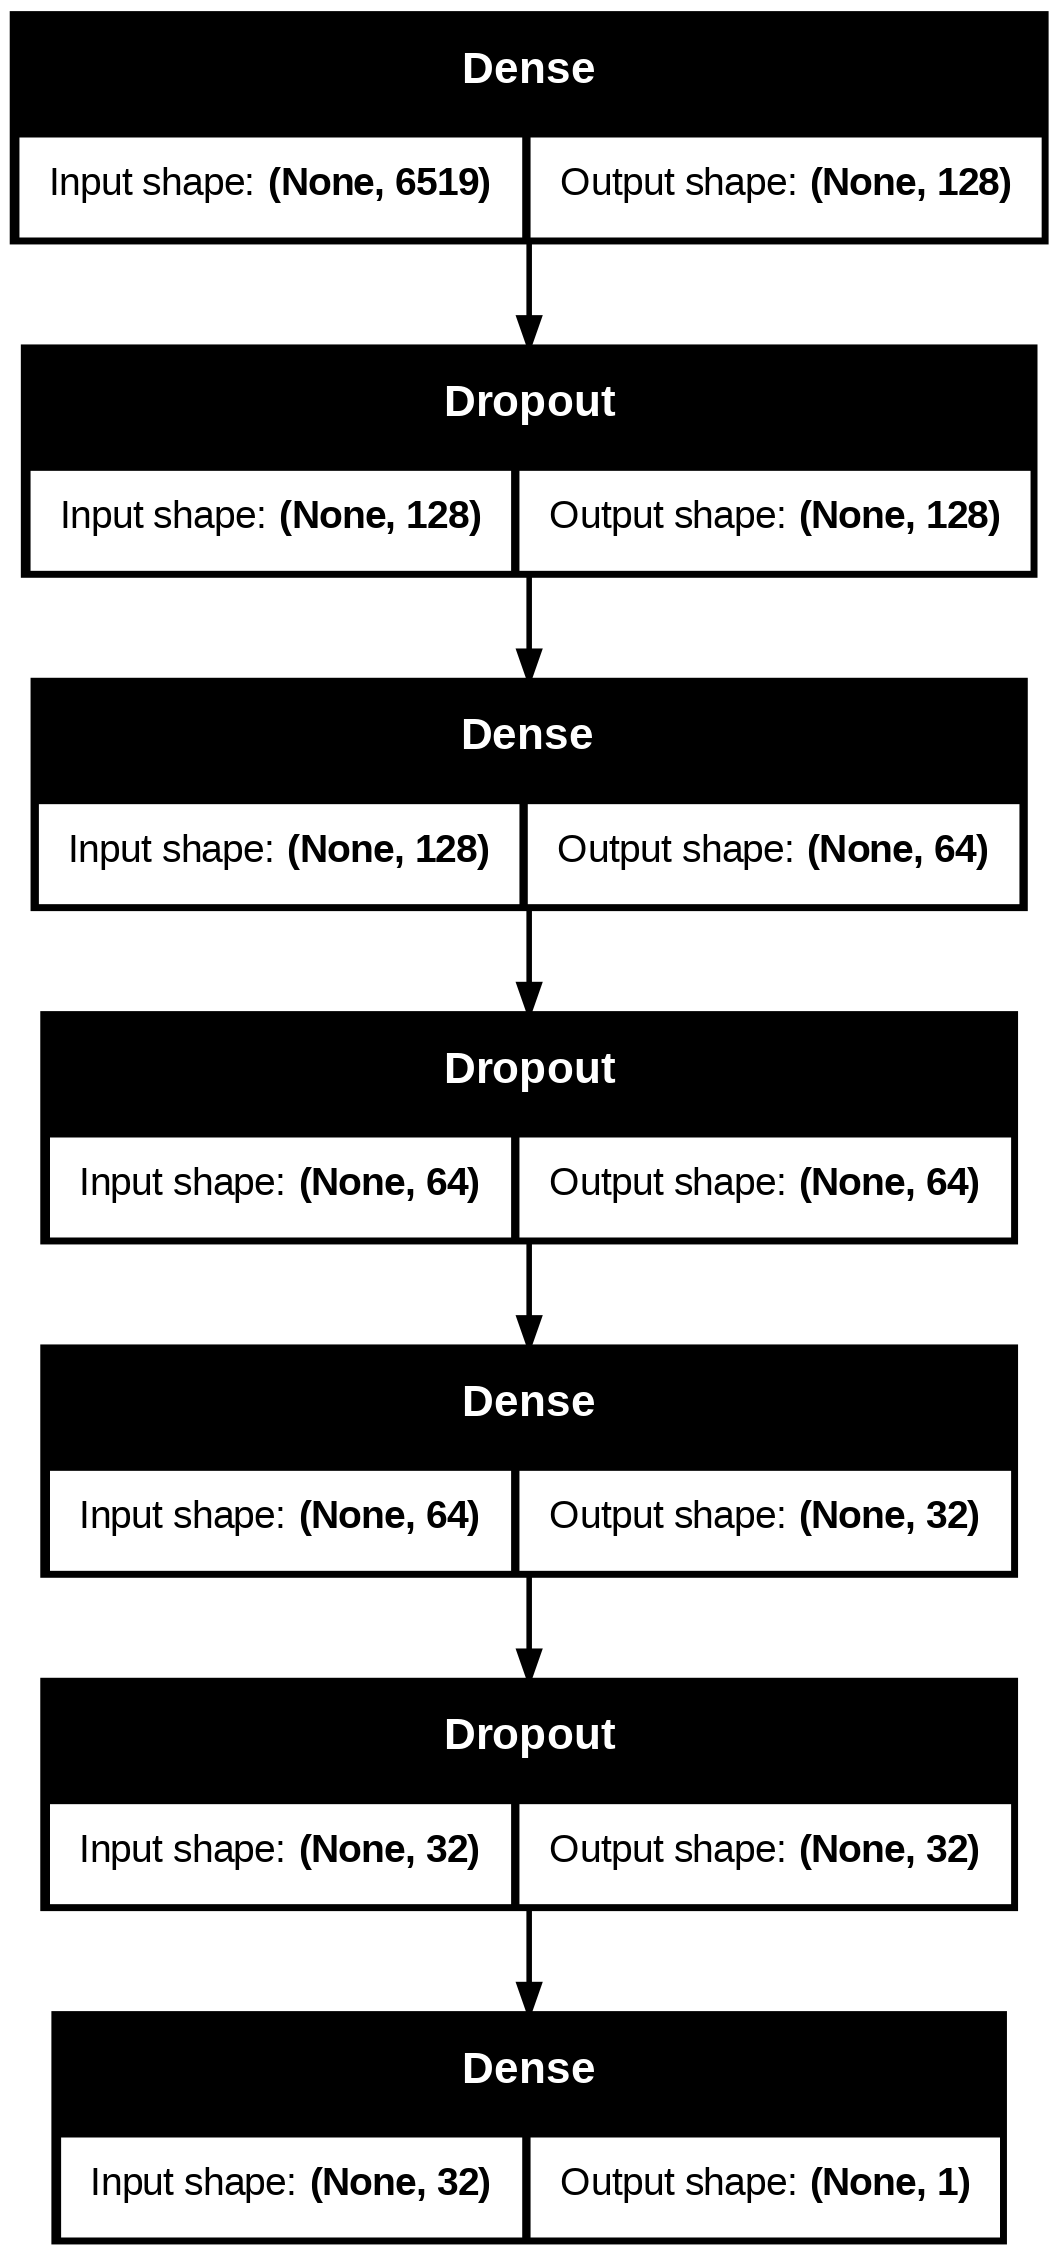

In [74]:
plot_model(sequential, to_file='model.png',show_shapes=True)

Se entrena el modelo llamando al método fit() con los datos escalados y se guardan los resultados del entrenamiento en el objeto modelhistory. El modelo se entrena durante 50 épocas con un tamaño de lote de 1024. También se proporcionan los datos de validación para que se evalúe el rendimiento del modelo en cada época.

In [75]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

modelhistory= sequential.fit(x_train_scaled, y_train_scaled, epochs=1000, batch_size=1024, validation_data=(x_val_scaled, y_val_scaled), callbacks=[early_stopping])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 1.8762 - mean_absolute_error: 0.7644 - mean_squared_error: 1.8762 - val_loss: 1.9363 - val_mean_absolute_error: 0.5417 - val_mean_squared_error: 1.9363
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.5972 - mean_absolute_error: 0.7296 - mean_squared_error: 1.5972 - val_loss: 1.9199 - val_mean_absolute_error: 0.5270 - val_mean_squared_error: 1.9199
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.4293 - mean_absolute_error: 0.7014 - mean_squared_error: 1.4293 - val_loss: 1.9059 - val_mean_absolute_error: 0.5140 - val_mean_squared_error: 1.9059
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.2992 - mean_absolute_error: 0.6753 - mean_squared_error: 1.2992 - val_loss: 1.8929 - val_mean_absolute_error: 0.5026 - val_mean_squared_error: 1.8929
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.2299 - mean_absolute_error: 0.6434 - mean_squared_error: 1.2299 - val_loss: 1.8817 - val_mean_ab

Ahora realiza la evaluación del modelo con el set de entrenamiento.

In [76]:
result = sequential.evaluate(x_test_scaled,y_test_scaled)
for i in range(len(sequential.metrics_names)):
    print("Metric ",sequential.metrics_names[i],":", str(round(result[i],2)))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2341 - mean_absolute_error: 0.2802 - mean_squared_error: 0.2341
Metric  loss : 0.26
Metric  compile_metrics : 0.29


Si el modelo cumple con el requerimiento, se guarda con el siguiente comando:

In [77]:
sequential.save('predictedprices.h5')

# 5. Realiza un gráfico que evidencia la evolución de la función de pérdidas a traves de las distintas épocas de entrenamiento.

In [78]:
modelhistory.history

{'loss': [1.6613978147506714,
  1.5554752349853516,
  1.5447789430618286,
  1.5017009973526,
  1.4221265316009521,
  1.40596342086792,
  1.3421761989593506,
  1.285191535949707,
  1.2497659921646118,
  1.1938726902008057,
  1.208476185798645,
  1.147031307220459,
  1.1249266862869263,
  1.0811364650726318,
  1.0876691341400146,
  1.0876405239105225,
  1.1062957048416138,
  1.101552128791809,
  1.0502173900604248,
  1.0464993715286255,
  1.0111852884292603,
  0.9815626740455627,
  0.9957333207130432,
  1.0107015371322632,
  0.9850977659225464,
  0.9579150676727295,
  0.9724485874176025,
  0.9838382601737976,
  0.9551871418952942,
  0.9470232725143433,
  0.8960605263710022,
  0.9271723031997681,
  0.8879233598709106,
  0.9222490191459656,
  0.887615978717804,
  0.8915479183197021,
  0.9309489727020264,
  0.8569967150688171,
  0.8712319731712341,
  0.8152243494987488,
  0.8661413788795471,
  0.8219538331031799,
  0.9060357213020325,
  0.8066366314888,
  0.8157022595405579,
  0.79016280174

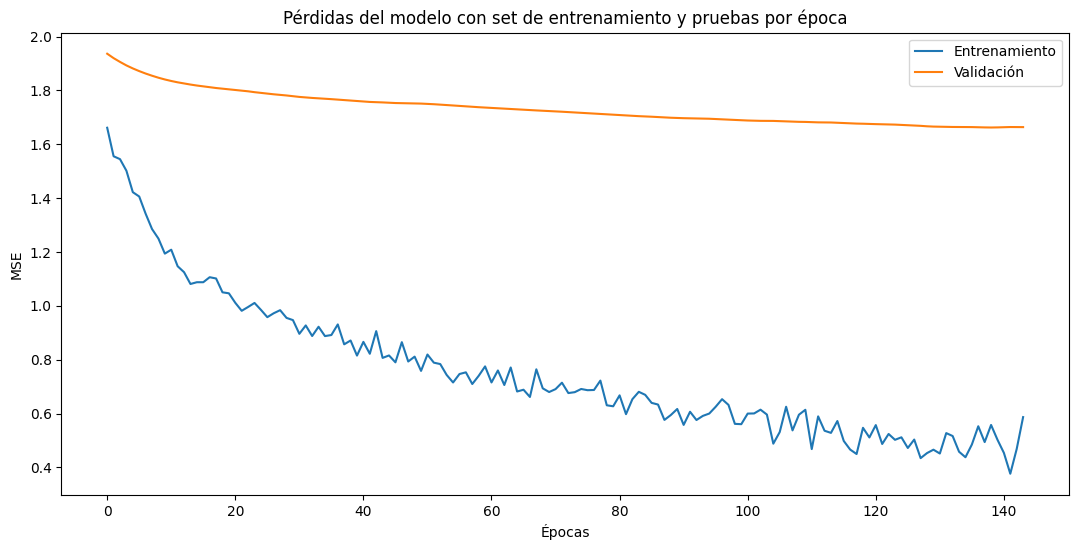

In [79]:
#Coloca tu código aquí
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,6))
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('MSE')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

Trata de realizar predicciones con el modelo

In [80]:
real=pd.DataFrame(y_train)
predic=sequential.predict(pd.DataFrame(x_train_scaled))
valores_reescalados = scaler1.inverse_transform(predic)
pred_escal =pd.DataFrame(valores_reescalados)
# Muestra los valores reales y las predicciones
for i in range(0,5):
	print("Real=%s, Prediccion=%s" % (real[0][i], pred_escal[0][i]))

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Real=16000.0, Prediccion=34451.87
Real=2500.0, Prediccion=24729.736
Real=109499.0, Prediccion=89213.58
Real=21990.0, Prediccion=36129.184
Real=27500.0, Prediccion=30228.148


___
¡Todo bien! ¡Es todo por hoy! 😀